In [1]:
import sys
sys.path.insert(0, "/lupus2/mpound/pdrtpy")

In [15]:
import pdrtpy.pdrutils as utils
from toolbox import PDRToolbox
from measurement import Measurement
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mpcolors
from matplotlib import ticker
from matplotlib.lines import Line2D

In [3]:
print(utils.wolfire())
print(utils.model_dir())
print(utils.root_dir())

/lupus2/mpound/pdrtpy/current_models.tab
/lupus2/mpound/pdrtpy/models/
/lupus2/mpound/pdrtpy/


In [4]:
p = PDRToolbox()

In [5]:
dir="/home/mpound/Dropbox/PDRmodels/"
cii_flux_file=dir+"n22_cii_convol_mips70.fits"
cii_err_file=dir+"n22_cii_err_convol_mips70.fits"
cii_combined_file="n22_cii_flux_error.fits"
oi_flux_file=dir+"n22_oi_regrid_convol_mips70.fits"
oi_combined_file="n22_oi_flux_error.fits"
oi_err_file=dir+"n22_oi_err_regrid_convol_mips70.fits"
TIR_flux_file=dir+"n22_TIR.fits"
TIR_combined_file="n22_TIR__flux_error.fits"
Measurement.makemeasurement(cii_flux_file,cii_err_file,cii_combined_file)
Measurement.makemeasurement(oi_flux_file,oi_err_file,oi_combined_file)
#Measurement.makemeasurement(TIR_flux_file,errorfile='rms',outfile=TIR_combined_file,rms=3E-6)
Measurement.makemeasurement(TIR_flux_file,error='10%',outfile=TIR_combined_file)
m1 = Measurement.read(cii_combined_file,identifier="CII_158")
m2 = Measurement.read(TIR_combined_file,identifier="FIR")
m3 = Measurement.read(oi_combined_file,identifier="OI_63")
p.addMeasurement([m1,m2,m3])

(139, 81)
(139, 81)
(139, 81)


In [6]:
p.run()

OI_63+CII_158/FIR
G0 shape  (4768,)
N shape  (4768,)


/lupus2/mpound/pdrtpy/toolbox.py:370: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.g0_map.data[spatial_idx]=g0
/lupus2/mpound/pdrtpy/toolbox.py:373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.n_map.data[spatial_idx]=n


In [7]:
#gh=utils.toHabing(p.g0_map)
p.g0_map.uncertainty = None

In [8]:
gh=utils.toHabing(p.g0_map)

In [9]:
type(gh)

measurement.Measurement

In [10]:
gh.unit

Unit("Habing")

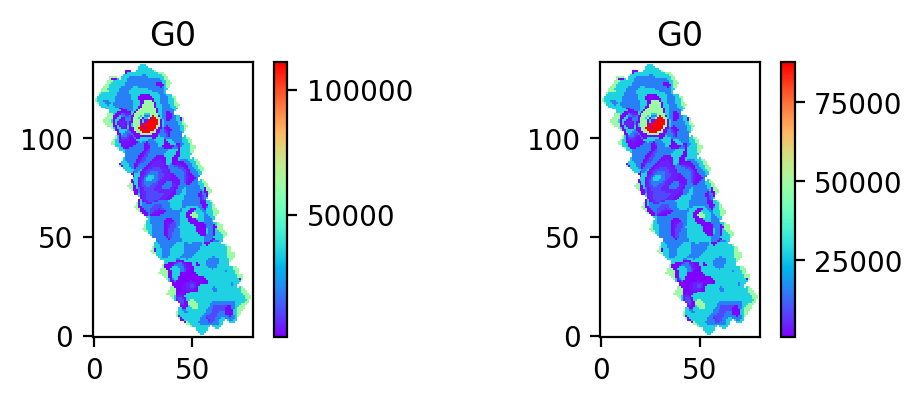

In [20]:
plt.rcParams["figure.dpi"] = 200
plt.subplot(2,2,1)
current_cmap = mcm.get_cmap('rainbow')
current_cmap.set_bad(color='white')
plt.imshow(gh,cmap=current_cmap,origin='lower')
plt.title("G0")
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(utils.toMathis(p.g0_map),cmap=current_cmap,origin='lower')
plt.title("G0")
plt.colorbar()

AttributeError: 'numpy.ndarray' object has no attribute 'nanmax'

In [1]:
myunit = "erg s-1 cm-2 sr-1"
m1 = Measurement(data=30.,uncertainty = StdDevUncertainty(5.0),identifier="OI_145",unit=myunit)
m2 = Measurement(data=10.,uncertainty = StdDevUncertainty(2.0),identifier="CI_609",unit=myunit)
m3 = Measurement(data=10.,uncertainty = StdDevUncertainty(1.5),identifier="CO_21",unit=myunit)
m4 = Measurement(data=100.,uncertainty = StdDevUncertainty(10.),identifier="CII_158",unit=myunit)


NameError: name 'Measurement' is not defined